# Whisper Model (Large & Small) Evaluation On Frequency of Occurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***
### Read Data File (Large)

In [26]:
cols = list(pd.read_csv("net_aigenerated_data_whisper_large_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_whisper_large = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-whisper/net_aigenerated_data_whisper_large_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'Whisper_large', 'WER', 'Stuttering_Count', 'Stu-wer-compared-groundtruth', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'stu-rouge1-precision', 'stu-rouge1-recall', 'stu-rouge1-f1', 'stu-rouge2-precision', 'stu-rouge2-recall', 'stu-rouge2-f1', 'stu-rougel-precision', 'stu-rougel-recall', 'stu-rougel-f1', 'Stu-rouge-compared-groundtruth', 'Duration', 'Freq_Duration', 'Freq_CharCount']


In [27]:
net_aigenerated_data_whisper_large = net_aigenerated_data_whisper_large.assign(Freq_Duration=net_aigenerated_data_whisper_large["Stuttering_Count"]/net_aigenerated_data_whisper_large["Duration"])
net_aigenerated_data_whisper_large = net_aigenerated_data_whisper_large.assign(Freq_CharCount=net_aigenerated_data_whisper_large["Stuttering_Count"]/net_aigenerated_data_whisper_large["Stu-wer-compared-groundtruth"].str.len())


In [28]:
net_aigenerated_data_whisper_large

,Filename,Start_time,End_time,Whisper_large,WER,Stuttering_Count,Stu-wer-compared-groundtruth,NA_Count,NA_Cleaned_Count,WER_Binned,...,stu-rouge2-precision,stu-rouge2-recall,stu-rouge2-f1,stu-rougel-precision,stu-rougel-recall,stu-rougel-f1,Stu-rouge-compared-groundtruth,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较的需要时间然后识别的他等你一会儿你那个话还没有说完还没有说出来的话他就取消了也...,0.247423,1.0,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,6,0,0.25,...,0.666667,0.524590,0.587156,0.888889,0.685714,0.774194,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,28.110000,0.035575,0.010309
1,D0001_A,790.130000,796.580000,第四句有我说的话,0.500000,1.0,电视剧有，我说的话。,6,0,0.50,...,0.500000,0.333333,0.400000,0.800000,0.571429,0.666667,电视剧有，我说的话。,6.450000,0.155039,0.100000
2,D0001_A,1562.083518,1586.220000,这部剧评分是不怎么好的因为评论区的那些人都在说男二号好惨的那个就那么情绪但是就一直输给男主角,0.312500,10.0,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,6,0,0.31,...,0.555556,0.375000,0.447761,0.857143,0.571429,0.685714,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,24.136482,0.414311,0.156250
3,D0001_A,2016.780000,2035.673559,很精准迅飞语音还是迅飞出手来的我记得他是叫迅飞我之前就是他,0.394737,7.0,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,6,0,0.39,...,0.333333,0.214286,0.260870,0.631579,0.387097,0.480000,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,18.893559,0.370497,0.184211
4,D0001_A,1682.670000,1709.110000,那个是叫什么来的我忘了就是出现了另一个人然后呢他就射了一把箭然后就把那个男二号给绑杀了就是可...,0.250000,8.0,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,6,0,0.25,...,0.583333,0.477273,0.525000,0.871795,0.693878,0.772727,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,26.440000,0.302572,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,三曲循环歌曲这样而已,0.181818,0.0,单曲循环歌曲这样而已。,6,0,0.18,...,0.750000,0.600000,0.666667,0.800000,0.666667,0.727273,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,杨幂的电影。,6,0,0.17,...,1.000000,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米亚今天柴油价怎么样,0.266667,0.0,你好，米雅，今天柴油价怎么样。,6,0,0.27,...,0.600000,0.375000,0.461538,0.833333,0.555556,0.666667,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲 琉璃光之歌,0.166667,0.0,单曲循环歌曲琉璃光之歌。,6,0,0.17,...,1.000000,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [29]:
## SAVING

net_aigenerated_data_whisper_large.to_csv('net_aigenerated_data_whisper_large_performance_stu.csv', sep=',')

# net_aigenerated_data_whisper_large

## Visualization (Large)

In [30]:
## Read file
net_aigenerated_data_whisper_large = pd.read_csv("net_aigenerated_data_whisper_large_performance_stu.csv", sep=",", index_col=0)

In [31]:
net_aigenerated_data_whisper_large

,Filename,Start_time,End_time,Whisper_large,WER,Stuttering_Count,Stu-wer-compared-groundtruth,NA_Count,NA_Cleaned_Count,WER_Binned,...,stu-rouge2-precision,stu-rouge2-recall,stu-rouge2-f1,stu-rougel-precision,stu-rougel-recall,stu-rougel-f1,Stu-rouge-compared-groundtruth,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较的需要时间然后识别的他等你一会儿你那个话还没有说完还没有说出来的话他就取消了也...,0.247423,1.0,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,6,0,0.25,...,0.666667,0.524590,0.587156,0.888889,0.685714,0.774194,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,28.110000,0.035575,0.010309
1,D0001_A,790.130000,796.580000,第四句有我说的话,0.500000,1.0,电视剧有，我说的话。,6,0,0.50,...,0.500000,0.333333,0.400000,0.800000,0.571429,0.666667,电视剧有，我说的话。,6.450000,0.155039,0.100000
2,D0001_A,1562.083518,1586.220000,这部剧评分是不怎么好的因为评论区的那些人都在说男二号好惨的那个就那么情绪但是就一直输给男主角,0.312500,10.0,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,6,0,0.31,...,0.555556,0.375000,0.447761,0.857143,0.571429,0.685714,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,24.136482,0.414311,0.156250
3,D0001_A,2016.780000,2035.673559,很精准迅飞语音还是迅飞出手来的我记得他是叫迅飞我之前就是他,0.394737,7.0,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,6,0,0.39,...,0.333333,0.214286,0.260870,0.631579,0.387097,0.480000,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,18.893559,0.370497,0.184211
4,D0001_A,1682.670000,1709.110000,那个是叫什么来的我忘了就是出现了另一个人然后呢他就射了一把箭然后就把那个男二号给绑杀了就是可...,0.250000,8.0,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,6,0,0.25,...,0.583333,0.477273,0.525000,0.871795,0.693878,0.772727,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,26.440000,0.302572,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,三曲循环歌曲这样而已,0.181818,0.0,单曲循环歌曲这样而已。,6,0,0.18,...,0.750000,0.600000,0.666667,0.800000,0.666667,0.727273,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,杨幂的电影。,6,0,0.17,...,1.000000,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米亚今天柴油价怎么样,0.266667,0.0,你好，米雅，今天柴油价怎么样。,6,0,0.27,...,0.600000,0.375000,0.461538,0.833333,0.555556,0.666667,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲 琉璃光之歌,0.166667,0.0,单曲循环歌曲琉璃光之歌。,6,0,0.17,...,1.000000,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


### Frequency setup: stuttering count/second

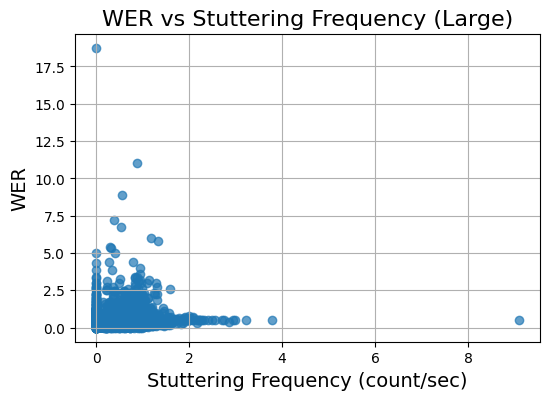

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_large["Freq_Duration"], 
    net_aigenerated_data_whisper_large["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [38]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_Duration'], net_aigenerated_data_whisper_large.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 2.8395281598873144e-48
rho = -0.07554530843023347


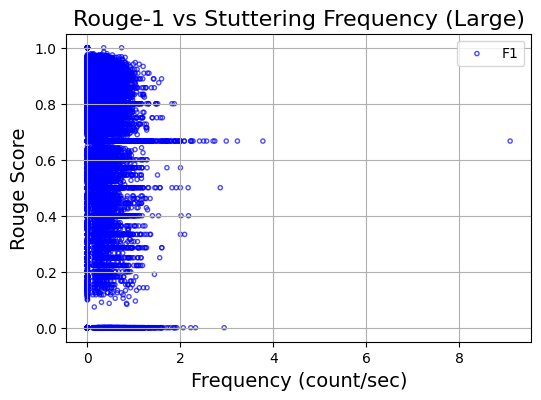

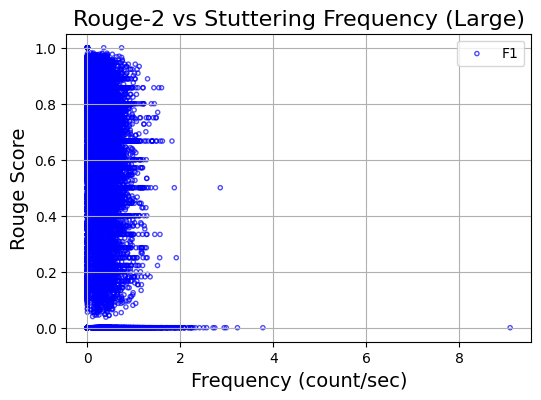

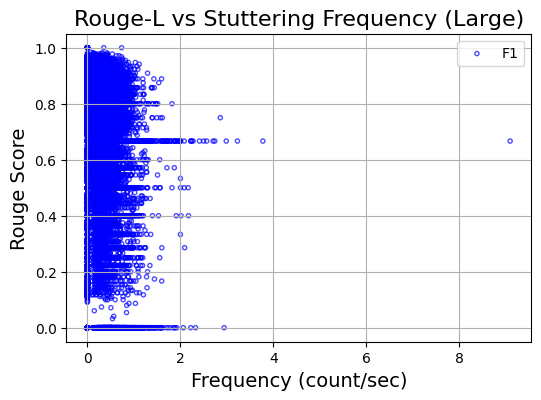

In [36]:
plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge1-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge1-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_Duration"], 
    net_aigenerated_data_whisper_large["stu-rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-1 vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge2-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge2-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_Duration"], 
    net_aigenerated_data_whisper_large["stu-rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rougel-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rougel-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_Duration"], 
    net_aigenerated_data_whisper_large["stu-rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [37]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_Duration'], net_aigenerated_data_whisper_large.dropna()['stu-rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_Duration'], net_aigenerated_data_whisper_large.dropna()['stu-rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_Duration'], net_aigenerated_data_whisper_large.dropna()['stu-rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 3.8626176946299966e-297
rho [stuttering count & rouge-1 f1] = 0.18919131015202922
p-value [stuttering count & rouge-2 f1] = 5.307088825958501e-192
rho [stuttering count & rouge-2 f1] = 0.15227171407191195
p-value [stuttering count & rouge-L f1] = 5.694909187639166e-204
rho [stuttering count & rouge-L f1] = 0.15693904192963995


### Frequency Setup: Stuttering Count/Character

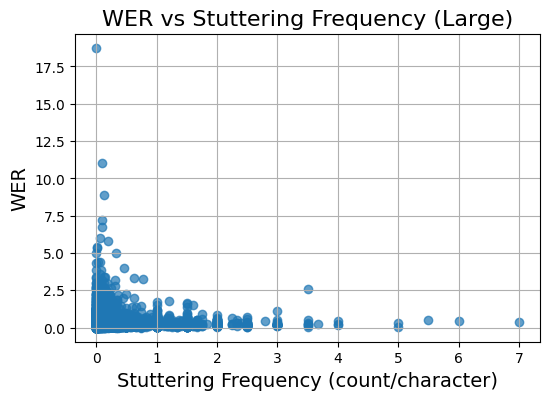

In [47]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_large["Freq_CharCount"], 
    net_aigenerated_data_whisper_large["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/character)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [43]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_large.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 6.731537445462133e-27
rho = -0.05560259766197091


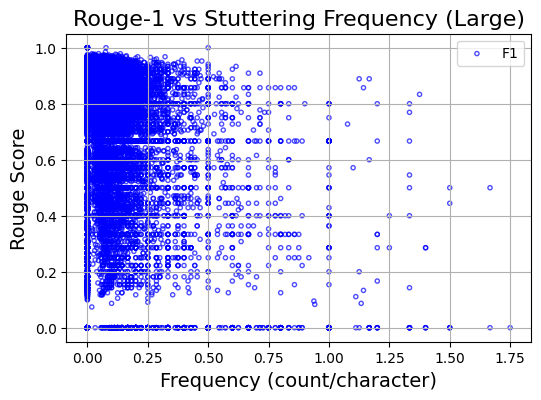

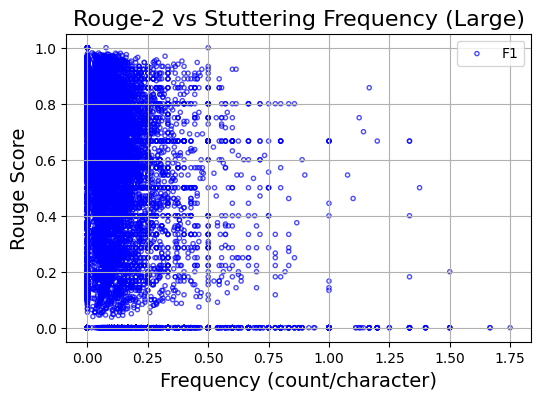

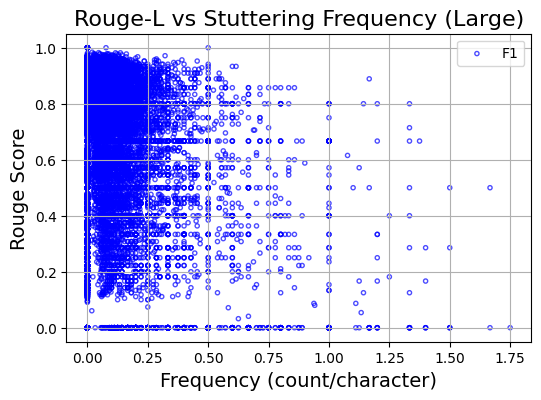

In [41]:
plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge1-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge1-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_CharCount"], 
    net_aigenerated_data_whisper_large["stu-rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-1 vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge2-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rouge2-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_CharCount"], 
    net_aigenerated_data_whisper_large["stu-rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rougel-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

# plt.scatter(
#     net_aigenerated_data_whisper_large["Freq_Duration"], 
#     net_aigenerated_data_whisper_large["stu-rougel-recall"], 
#     facecolors="none", edgecolors='g',
#     label="Recall",
#     marker="^",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_large["Freq_CharCount"], 
    net_aigenerated_data_whisper_large["stu-rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Large)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [42]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_large.dropna()['stu-rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_large.dropna()['stu-rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_large.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_large.dropna()['stu-rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 1.0723896720951952e-217
rho [stuttering count & rouge-1 f1] = 0.1621179736503659
p-value [stuttering count & rouge-2 f1] = 3.9232988997684927e-141
rho [stuttering count & rouge-2 f1] = 0.1305019293888451
p-value [stuttering count & rouge-L f1] = 7.340547955119192e-144
rho [stuttering count & rouge-L f1] = 0.1317641313405508


***
### Read Data File (Tiny)

In [44]:
cols = list(pd.read_csv("net_aigenerated_data_whisper_tiny_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_whisper_tiny = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-whisper/net_aigenerated_data_whisper_tiny_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'Whisper_tiny', 'WER', 'Stuttering_Count', 'Stu-wer-compared-groundtruth', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'stu-rouge1-precision', 'stu-rouge1-recall', 'stu-rouge1-f1', 'stu-rouge2-precision', 'stu-rouge2-recall', 'stu-rouge2-f1', 'stu-rougel-precision', 'stu-rougel-recall', 'stu-rougel-f1', 'Stu-rouge-compared-groundtruth', 'Duration']


In [46]:
net_aigenerated_data_whisper_tiny = net_aigenerated_data_whisper_tiny.assign(Freq_Duration=net_aigenerated_data_whisper_tiny["Stuttering_Count"]/net_aigenerated_data_whisper_tiny["Duration"])
net_aigenerated_data_whisper_tiny = net_aigenerated_data_whisper_tiny.assign(Freq_CharCount=net_aigenerated_data_whisper_tiny["Stuttering_Count"]/net_aigenerated_data_whisper_tiny["Stu-wer-compared-groundtruth"].str.len())


In [57]:
net_aigenerated_data_whisper_tiny

,Filename,Start_time,End_time,Whisper_tiny,WER,Stuttering_Count,Stu-wer-compared-groundtruth,NA_Count,NA_Cleaned_Count,WER_Binned,...,stu-rouge2-precision,stu-rouge2-recall,stu-rouge2-f1,stu-rougel-precision,stu-rougel-recall,stu-rougel-f1,Stu-rouge-compared-groundtruth,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较不需要时间然后那个食别的他的就是他等你一会那个话还没有收完都还没有说出来的话他...,0.278351,1.0,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,332,0,0.28,...,0.480769,0.409836,0.442478,0.724138,0.600000,0.656250,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,28.110000,0.035575,0.010309
1,D0001_A,790.130000,796.580000,在牙我收到,0.800000,1.0,电视剧有，我说的话。,332,0,0.80,...,0.000000,0.000000,0.000000,0.250000,0.142857,0.181818,电视剧有，我说的话。,6.450000,0.155039,0.100000
2,D0001_A,1562.083518,1586.220000,在不计是不怎么平分是不怎么好的就因为平分缺的那些人都在说然后我做好产的那个就那么请问但是就一...,0.437500,10.0,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,332,0,0.44,...,0.333333,0.275000,0.301370,0.571429,0.476190,0.519481,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,24.136482,0.414311,0.156250
3,D0001_A,2016.780000,2035.673559,很精准的兴非女人还是兴非出手来的就我记得她是叫兴非我之前就是她,0.500000,7.0,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,332,0,0.50,...,0.300000,0.214286,0.250000,0.571429,0.387097,0.461538,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,18.893559,0.370497,0.184211
4,D0001_A,1682.670000,1709.110000,一个那个是叫抓来的我忘了就是出现了你那个一个人然后他就这了一把剑然后就就把那个拿到给葬撒了就...,0.367647,8.0,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,332,0,0.37,...,0.378378,0.318182,0.345679,0.717949,0.571429,0.636364,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,26.440000,0.302572,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,"單許宣傳歌曲,這樣而已",0.727273,0.0,单曲循环歌曲这样而已。,332,0,0.73,...,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,楊秘的電影,0.666667,0.0,杨幂的电影。,332,0,0.67,...,0.000000,0.000000,0.000000,0.333333,0.250000,0.285714,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,"你好米哈,今天菜油駕怎么样",0.400000,0.0,你好，米雅，今天柴油价怎么样。,332,0,0.40,...,0.000000,0.000000,0.000000,0.428571,0.333333,0.375000,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,單取新環科曲劉旅光這個,0.750000,0.0,单曲循环歌曲琉璃光之歌。,332,0,0.75,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [48]:
## SAVING

net_aigenerated_data_whisper_tiny.to_csv('net_aigenerated_data_whisper_tiny_performance_stu.csv', sep=',')

# net_aigenerated_data_whisper_tiny

## Visualization (Tiny)

### Frequency setup: stuttering count/second

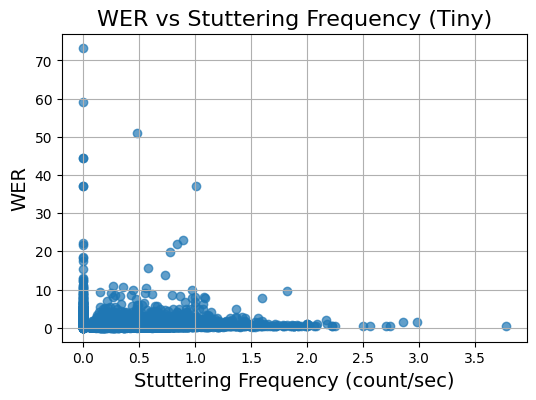

In [58]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_Duration"], 
    net_aigenerated_data_whisper_tiny["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [80]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_Duration'], net_aigenerated_data_whisper_tiny.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 2.358889938677811e-153
rho = -0.13665623502921637


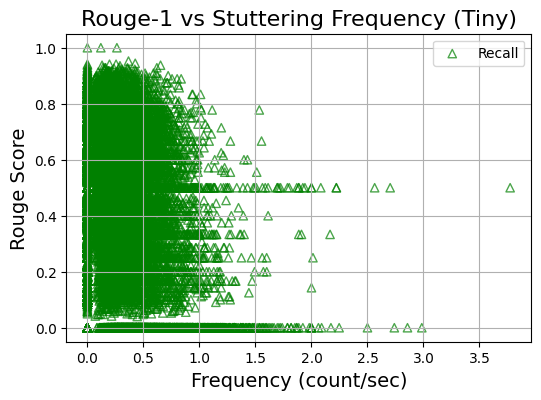

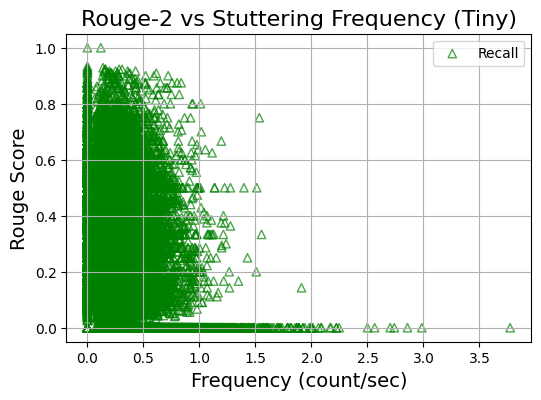

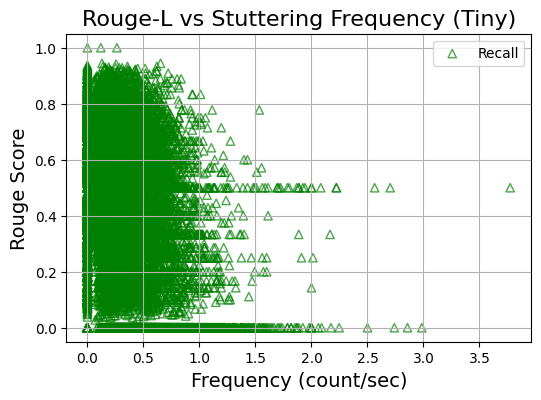

In [83]:
plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rouge1-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_Duration"], 
    net_aigenerated_data_whisper_tiny["stu-rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)

# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rouge1-f1"], 
#     facecolors="none", edgecolors='b',
#     label="F1",
#     marker=".",
#     alpha=0.7  # Handle overlapping points
# )

plt.title("Rouge-1 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rouge2-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_Duration"], 
    net_aigenerated_data_whisper_tiny["stu-rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)

# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rouge2-f1"], 
#     facecolors="none", edgecolors='b',
#     label="F1",
#     marker=".",
#     alpha=0.7  # Handle overlapping points
# )

plt.title("Rouge-2 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rougel-precision"], 
#     facecolors="none", edgecolors='r',
#     label="Precision",
#     marker="8",
#     alpha=0.7  # Handle overlapping points
# )

plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_Duration"], 
    net_aigenerated_data_whisper_tiny["stu-rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)

# plt.scatter(
#     net_aigenerated_data_whisper_tiny["Freq_Duration"], 
#     net_aigenerated_data_whisper_tiny["stu-rougel-f1"], 
#     facecolors="none", edgecolors='b',
#     label="F1",
#     marker=".",
#     alpha=0.7  # Handle overlapping points
# )

plt.title("Rouge-L vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/sec)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [85]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_Duration'], net_aigenerated_data_whisper_tiny.dropna()['stu-rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_Duration'], net_aigenerated_data_whisper_tiny.dropna()['stu-rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_Duration'], net_aigenerated_data_whisper_tiny.dropna()['stu-rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 0.0
rho [stuttering count & rouge-1 f1] = 0.27800649651775305
p-value [stuttering count & rouge-2 f1] = 0.0
rho [stuttering count & rouge-2 f1] = 0.3094502550427058
p-value [stuttering count & rouge-L f1] = 0.0
rho [stuttering count & rouge-L f1] = 0.270867628881476


### Frequency Setup: Stuttering Count/Character

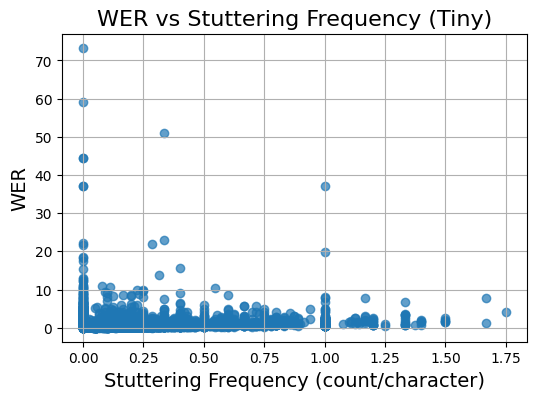

In [86]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/character)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [91]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_tiny.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 1.260329361719211e-99
rho = -0.10994021914660808


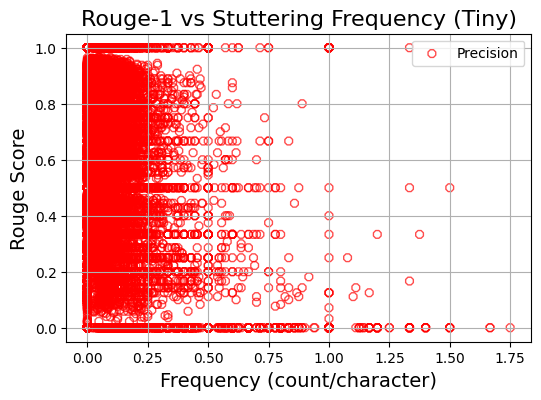

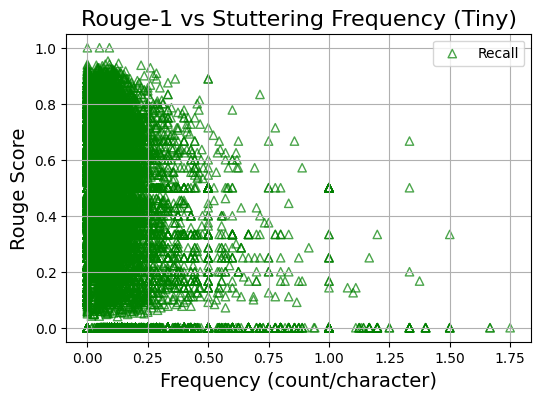

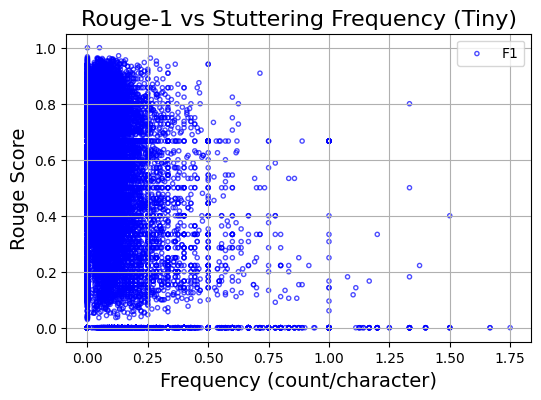

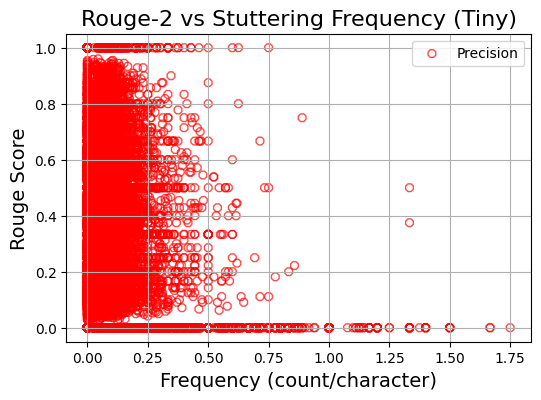

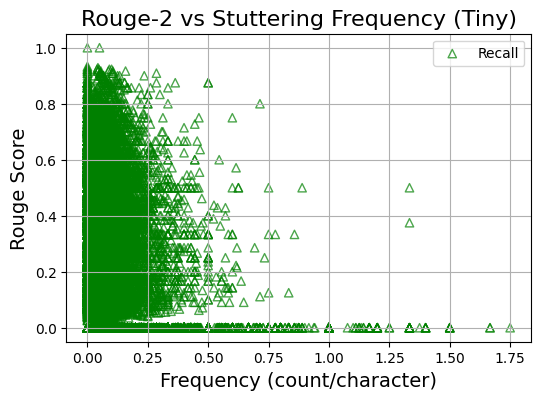

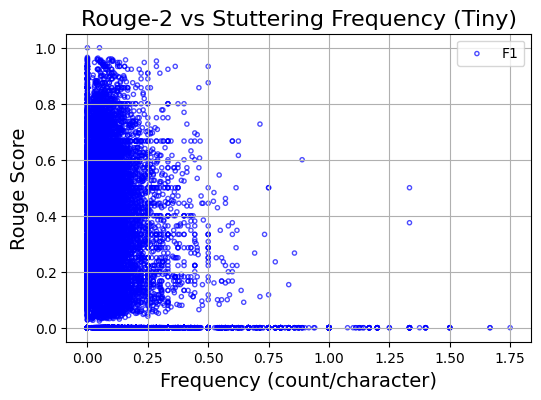

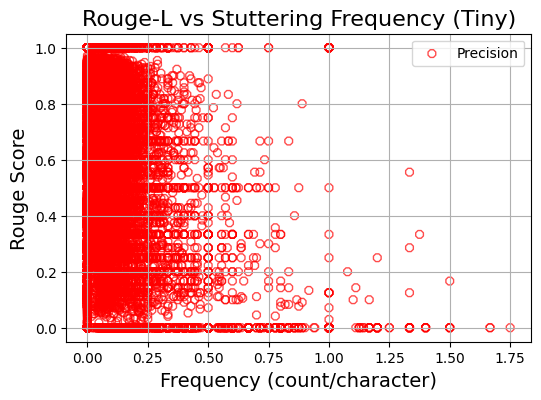

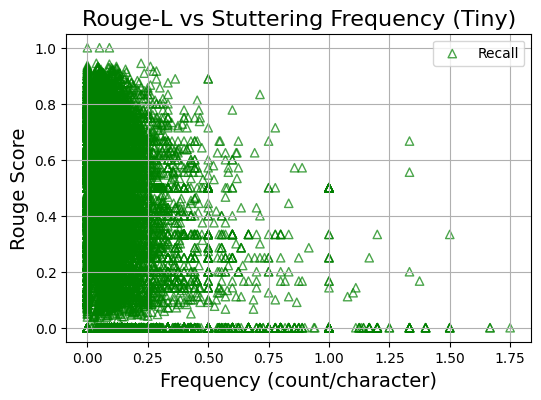

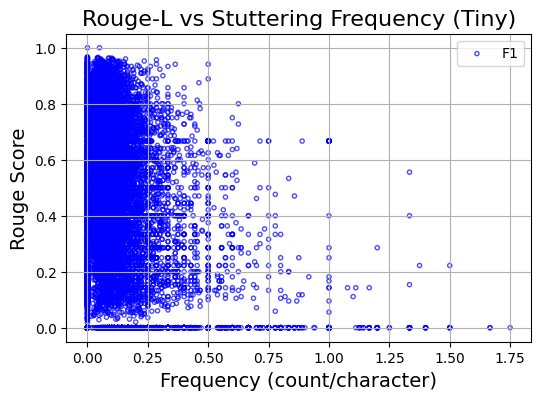

In [90]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_whisper_tiny["Freq_CharCount"], 
    net_aigenerated_data_whisper_tiny["stu-rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Tiny)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [92]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_tiny.dropna()['stu-rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_tiny.dropna()['stu-rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_whisper_tiny.dropna()['Freq_CharCount'], net_aigenerated_data_whisper_tiny.dropna()['stu-rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 0.0
rho [stuttering count & rouge-1 f1] = 0.2504560307398659
p-value [stuttering count & rouge-2 f1] = 0.0
rho [stuttering count & rouge-2 f1] = 0.2800313887900639
p-value [stuttering count & rouge-L f1] = 0.0
rho [stuttering count & rouge-L f1] = 0.24338704822936555
